Grafiek opgeslagen als: Efficiency_Map_M._Csinger.png


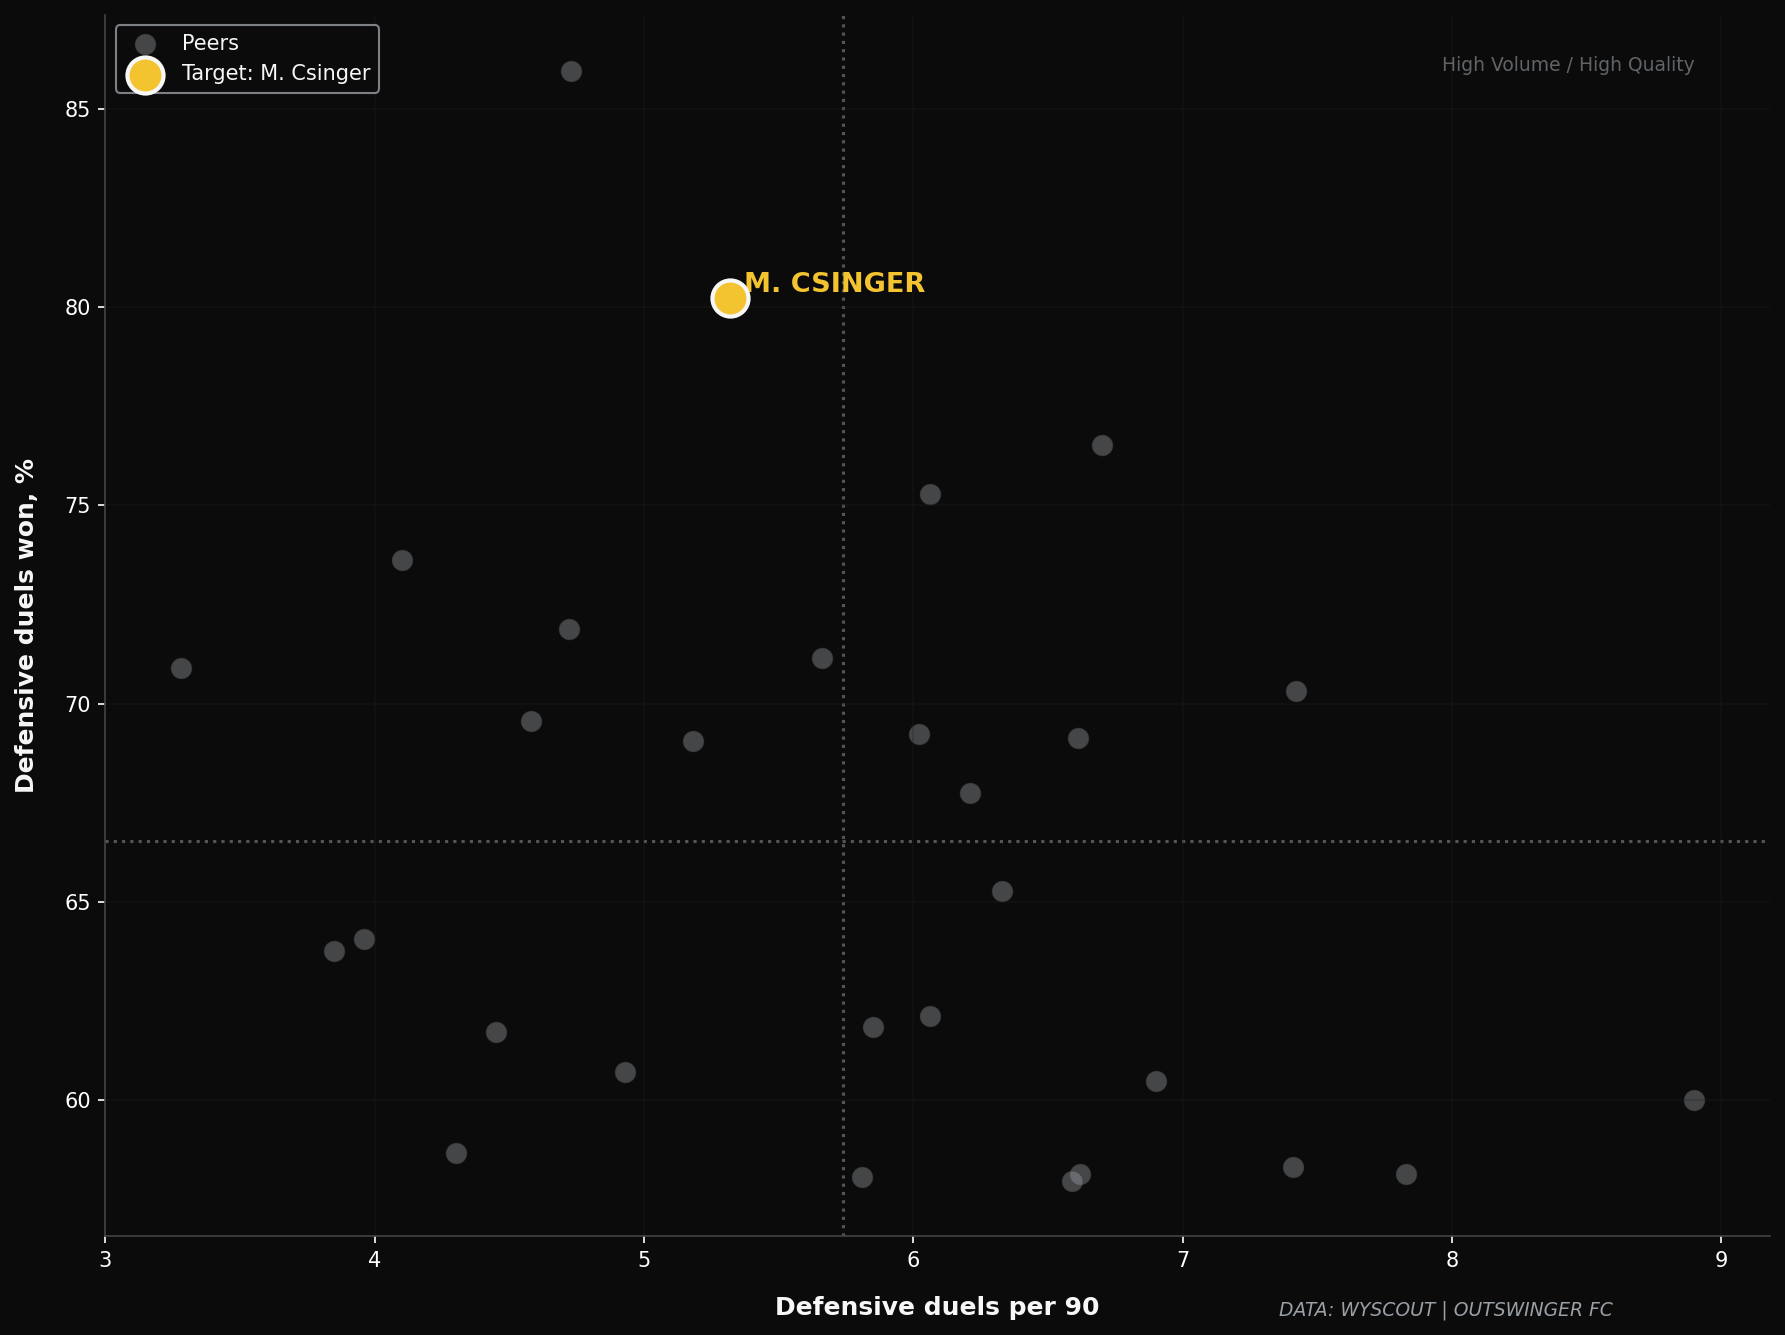

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATIE & KLEUREN ---
COLORS = {
    'yellow': '#F4C430',
    'black': '#0B0B0B',
    'white': '#F7F7F7',
    'grey': '#9AA0A6',
    'emerald': '#2ECC71'
}

def generate_efficiency_scatter(target_player):
    # --- 2. DATA LADEN (EXCEL) ---
    file_path = '/Users/user/Downloads/Hungary.xlsx'
    
    try:
        df = pd.read_excel(file_path)
    except Exception as e:
        print(f"Error: Kan bestand niet laden. Details: {e}")
        return

    # --- 3. FILTEREN (LW and LAMF) ---
    # We use '|' which acts as OR in regex to find both positions
    # case=False ensures it finds 'lw' or 'LW'
    pos_filter = 'LCB|RCB'
    mask = (df['Position'].str.contains(pos_filter, na=False, case=False)) & (df['Minutes played'] >= 900)
    filtered_df = df[mask].copy()

    if target_player not in filtered_df['Player'].values:
        print(f"Waarschuwing: {target_player} niet gevonden in de gefilterde lijst.")
        # Optional: Print available players to help debugging
        # print(filtered_df['Player'].unique())

    # --- 4. VISUALISATIE ---
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 9), dpi=150)
    fig.set_facecolor(COLORS['black'])
    ax.set_facecolor(COLORS['black'])

    # Scatter of other players
    others = filtered_df[filtered_df['Player'] != target_player]
    ax.scatter(others['Defensive duels per 90'], others['Defensive duels won, %'], 
               color=COLORS['grey'], alpha=0.4, s=100, label='Peers', edgecolors='#333333', linewidth=0.5)

    # Highlight Target Player
    target = filtered_df[filtered_df['Player'] == target_player]
    if not target.empty:
        ax.scatter(target['Defensive duels per 90'], target['Defensive duels won, %'], 
                   color=COLORS['yellow'], s=300, edgecolors=COLORS['white'], 
                   linewidth=2, zorder=10, label=f'Target: {target_player}')
        
        ax.text(target['Defensive duels per 90'].values[0] + 0.05, 
                target['Defensive duels won, %'].values[0] + 0.005, 
                target_player.upper(), color=COLORS['yellow'], 
                fontweight='bold', fontsize=13, va='bottom')

    # Mean lines
    avg_def_duels = filtered_df['Defensive duels per 90'].mean()
    avg_def_duels_won = filtered_df['Defensive duels won, %'].mean()
    
    ax.axvline(avg_def_duels, color=COLORS['grey'], linestyle=':', alpha=0.5, zorder=1)
    ax.axhline(avg_def_duels_won, color=COLORS['grey'], linestyle=':', alpha=0.5, zorder=1)
    # --- 5. STYLING & LABELS ---
    ax.set_xlabel('Defensive duels per 90', color=COLORS['white'], fontsize=12, fontweight='bold', labelpad=12)
    ax.set_ylabel('Defensive duels won, %', color=COLORS['white'], fontsize=12, fontweight='bold', labelpad=12)

    # Quadrant annotations
    max_x = filtered_df['Defensive duels per 90'].max()
    max_y = filtered_df['Defensive duels won, %'].max()
    ax.text(max_x, max_y, 'High Volume / High Quality', color=COLORS['grey'], alpha=0.6, fontsize=9, ha='right')

    ax.grid(color='#222222', linestyle='-', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#444444')
    ax.spines['bottom'].set_color('#444444')

    leg = ax.legend(facecolor=COLORS['black'], edgecolor=COLORS['grey'], loc='upper left')
    for text in leg.get_texts():
        text.set_color(COLORS['white'])

    fig.text(0.9, 0.02, 'DATA: WYSCOUT | OUTSWINGER FC', 
             color=COLORS['grey'], ha='right', fontsize=9, style='italic')

    plt.tight_layout()
    
    output_filename = f"Efficiency_Map_{target_player.replace(' ', '_')}.png"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', facecolor=COLORS['black'])
    print(f"Grafiek opgeslagen als: {output_filename}")
    plt.show()

# --- RUN ---
generate_efficiency_scatter('M. Csinger')

Grafiek opgeslagen als: Defensive_Analysis_M._Csinger.png


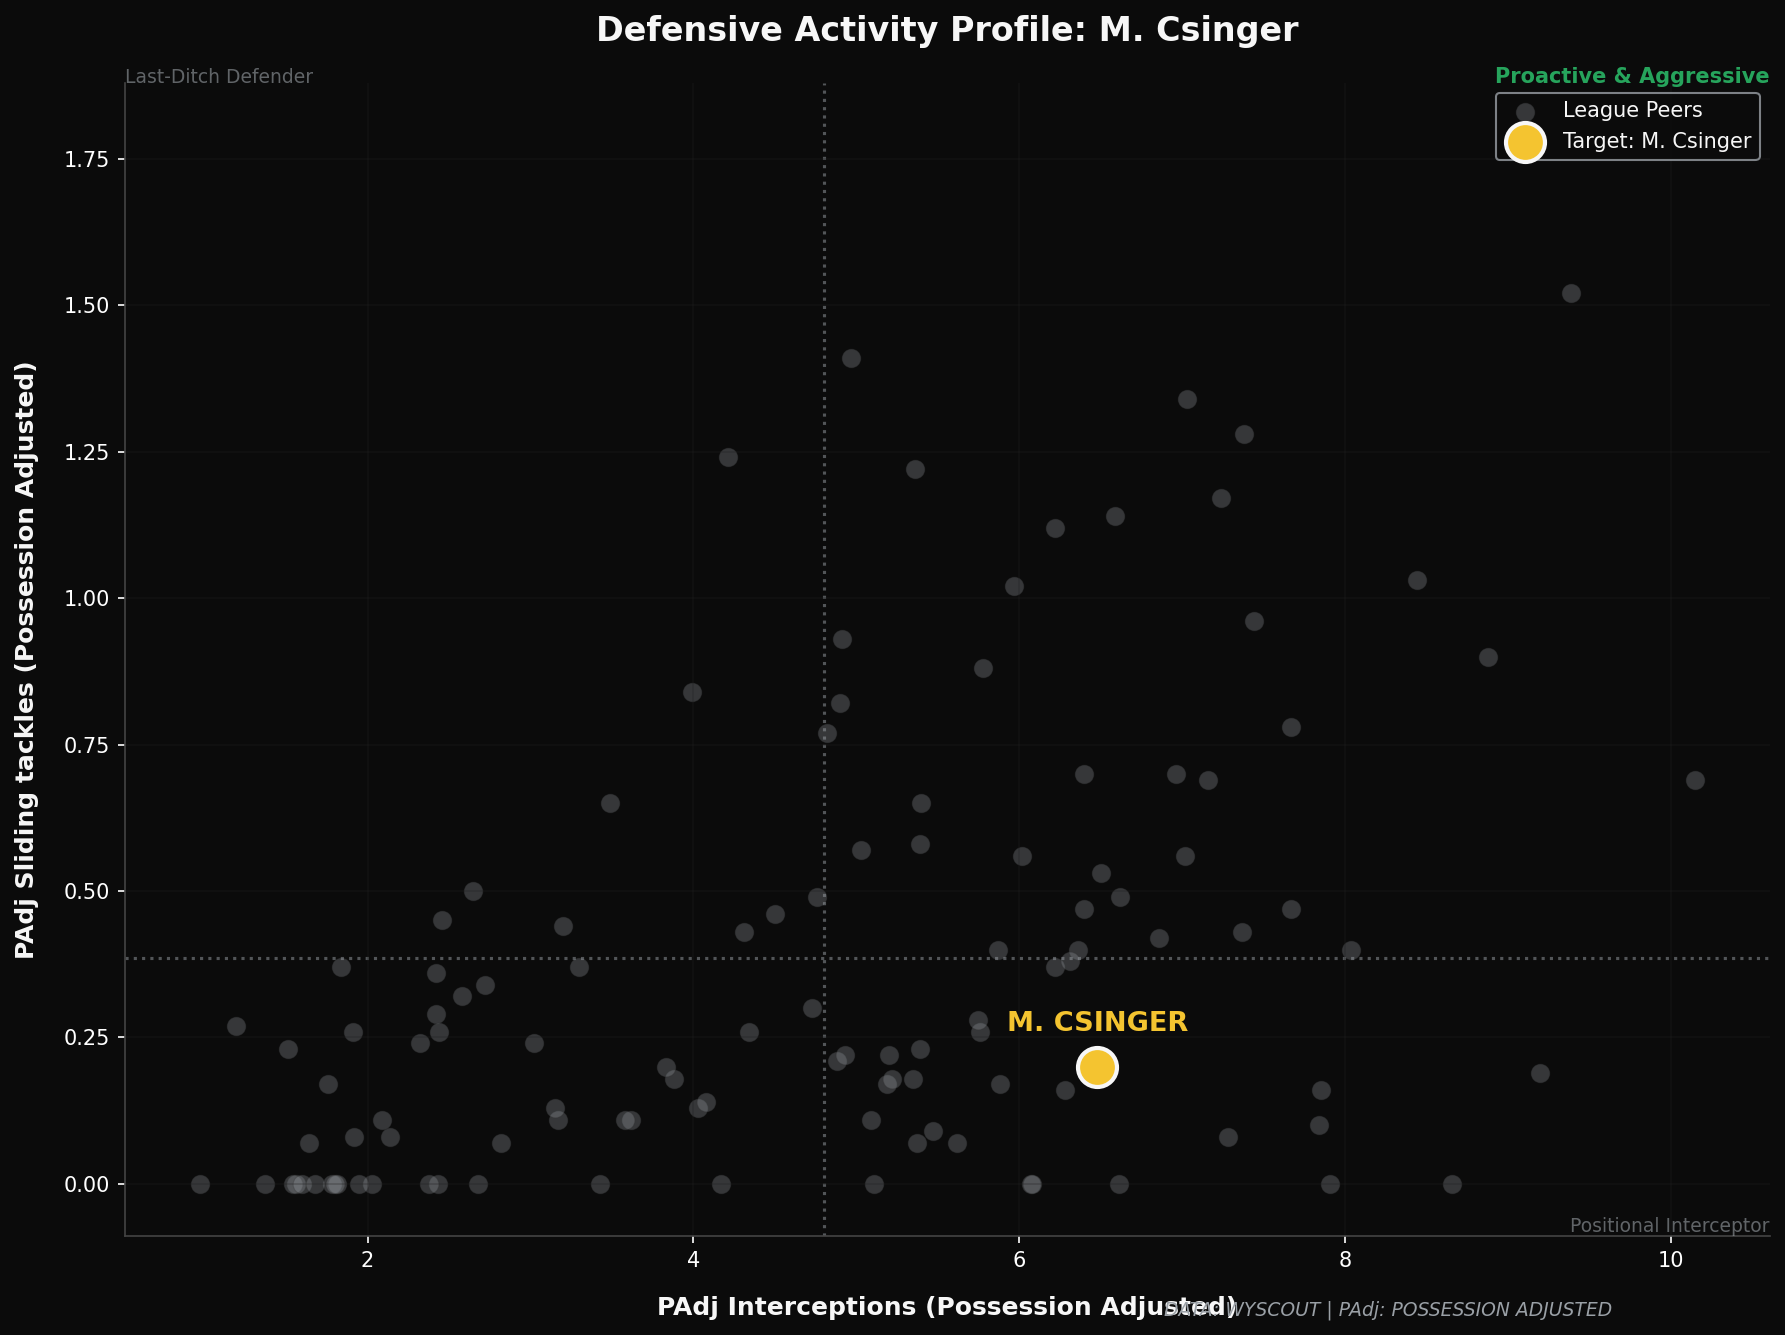

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATIE & KLEUREN ---
COLORS = {
    'yellow': '#F4C430',
    'black': '#0B0B0B',
    'white': '#F7F7F7',
    'grey': '#9AA0A6',
    'emerald': '#2ECC71',
    'blue': '#3498DB'
}

def generate_defensive_profile_scatter(target_player):
    # --- 2. DATA LADEN ---
    # Pas het pad aan naar de locatie van je bestand
    file_path = '/Users/user/Downloads/Hungary.xlsx'
    
    try:
        df = pd.read_excel(file_path)
    except Exception as e:
        print(f"Error: Kan bestand niet laden. Details: {e}")
        return

    # --- 3. FILTEREN (900+ Minuten) ---
    # We filteren op speeltijd om uitschieters door kleine samples te voorkomen
    mask = (df['Minutes played'] >= 900)
    filtered_df = df[mask].copy()

    if target_player not in filtered_df['Player'].values:
        print(f"Waarschuwing: {target_player} niet gevonden in de lijst (mogelijk < 900 min).")
        # Toon vergelijkbare namen als de speler niet exact wordt gevonden
        sims = df[df['Player'].str.contains(target_player.split()[-1], na=False)]['Player'].tolist()
        if sims: print(f"Bedoelde je: {sims}?")

    # --- 4. VISUALISATIE ---
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 9), dpi=150)
    fig.set_facecolor(COLORS['black'])
    ax.set_facecolor(COLORS['black'])

    # Metrics
    x_metric = 'PAdj Interceptions'
    y_metric = 'PAdj Sliding tackles'

    # Scatter van alle gefilterde spelers
    others = filtered_df[filtered_df['Player'] != target_player]
    ax.scatter(others[x_metric], others[y_metric], 
               color=COLORS['grey'], alpha=0.3, s=80, label='League Peers', edgecolors='#333333', linewidth=0.5)

    # Highlight Target Player
    target = filtered_df[filtered_df['Player'] == target_player]
    if not target.empty:
        ax.scatter(target[x_metric], target[y_metric], 
                   color=COLORS['yellow'], s=350, edgecolors=COLORS['white'], 
                   linewidth=2, zorder=10, label=f'Target: {target_player}')
        
        ax.text(target[x_metric].values[0], 
                target[y_metric].values[0] + 0.05, 
                target_player.upper(), color=COLORS['yellow'], 
                fontweight='bold', fontsize=13, va='bottom', ha='center')

    # Gemiddelden (Mean lines)
    avg_x = filtered_df[x_metric].mean()
    avg_y = filtered_df[y_metric].mean()
    
    ax.axvline(avg_x, color=COLORS['grey'], linestyle=':', alpha=0.5, zorder=1)
    ax.axhline(avg_y, color=COLORS['grey'], linestyle=':', alpha=0.5, zorder=1)

    # --- 5. STYLING & LABELS ---
    ax.set_xlabel(f'{x_metric} (Possession Adjusted)', color=COLORS['white'], fontsize=12, fontweight='bold', labelpad=12)
    ax.set_ylabel(f'{y_metric} (Possession Adjusted)', color=COLORS['white'], fontsize=12, fontweight='bold', labelpad=12)
    ax.set_title(f'Defensive Activity Profile: {target_player}', color=COLORS['white'], fontsize=16, fontweight='bold', pad=20)
    
    # Kwadrant annotaties
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    ax.text(xlims[1], ylims[1], 'Proactive & Aggressive', color=COLORS['emerald'], alpha=0.8, fontsize=10, ha='right', weight='bold')
    ax.text(xlims[0], ylims[1], 'Last-Ditch Defender', color=COLORS['grey'], alpha=0.6, fontsize=9, ha='left')
    ax.text(xlims[1], ylims[0], 'Positional Interceptor', color=COLORS['grey'], alpha=0.6, fontsize=9, ha='right', va='bottom')

    # Grid and Spines
    ax.grid(color='#222222', linestyle='-', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#444444')
    ax.spines['bottom'].set_color('#444444')

    # Legend
    leg = ax.legend(facecolor=COLORS['black'], edgecolor=COLORS['grey'], loc='upper right')
    for text in leg.get_texts():
        text.set_color(COLORS['white'])

    # Footer
    fig.text(0.9, 0.02, 'DATA: WYSCOUT | PAdj: POSSESSION ADJUSTED', 
             color=COLORS['grey'], ha='right', fontsize=9, style='italic')

    plt.tight_layout()
    
    # Opslaan
    output_filename = f"Defensive_Analysis_{target_player.replace(' ', '_')}.png"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', facecolor=COLORS['black'])
    print(f"Grafiek opgeslagen als: {output_filename}")
    plt.show()

# --- UITVOEREN ---
generate_defensive_profile_scatter('M. Csinger')

In [2]:
import pandas as pd
import json

# 1. Load the CSV data containing xG values
csv_file = '/Users/user/XG/Saudi/xgCSV/2025-08-28_Damac FC - Al Hazem SC.csv'
csv_df = pd.read_csv(csv_file)

# 2. Load the original JSON file
json_file = '/Users/user/XG/Saudi/DONE/2025-08-28_Damac FC - Al Hazem SC.json'
with open(json_file, 'r') as f:
    match_data = json.load(f)

# 3. Create a mapping from the CSV for easy lookup
# We use a tuple of (timeMin, timeSec, x, y) as a unique key for shots
csv_shots_map = {}
for idx, row in csv_df.iterrows():
    # Rounding x and y to 1 decimal place to ensure matching consistency
    key = (int(row['timeMin']), int(row['timeSec']), round(float(row['x']), 1), round(float(row['y']), 1))
    csv_shots_map[key] = row['xG']

# 4. Define shot type IDs (usually 13, 14, 15, 16 in Opta-style data)
shot_types = [13, 14, 15, 16]

# 5. Iterate through JSON events and inject xG where a match is found
matched_count = 0
for event in match_data['event']:
    if event.get('typeId') in shot_types:
        key = (
            int(event['timeMin']), 
            int(event['timeSec']), 
            round(float(event['x']), 1), 
            round(float(event['y']), 1)
        )
        
        if key in csv_shots_map:
            # Add the xG value to the JSON event object
            event['xG'] = csv_shots_map[key]
            matched_count += 1

print(f"Successfully matched and updated {matched_count} shots.")

# 6. Save the updated JSON to a new file
output_filename = '/Users/user/XG/Saudi/Total/2025-08-28_Damac FC - Al Hazem SC_updated.json'
with open(output_filename, 'w') as f:
    json.dump(match_data, f, indent=2)

print(f"Updated JSON saved as: {output_filename}")

Successfully matched and updated 18 shots.
Updated JSON saved as: /Users/user/XG/Saudi/Total/2025-08-28_Damac FC - Al Hazem SC_updated.json


In [6]:
import os
import json
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
# These must match your folder locations
JSON_FOLDER = Path(r'/Users/user/XG/Saudi/DONE')
CSV_FOLDER = Path(r'/Users/user/XG/Saudi/xgCSV')
TOTAL_FOLDER = Path(r'/Users/user/XG/Saudi/Total')

# Ensure output folder exists
TOTAL_FOLDER.mkdir(parents=True, exist_ok=True)

# Event IDs for shots (13: Miss, 14: Post, 15: Saved, 16: Goal)
SHOT_TYPES = [13, 14, 15, 16]

def merge_data():
    # 1. Map files by title (ignoring extension)
    json_files = {f.stem: f for f in JSON_FOLDER.glob('*.json') if not f.name.endswith('_merged.json')}
    csv_files = {f.stem: f for f in CSV_FOLDER.glob('*.csv')}
    
    common_titles = set(json_files.keys()).intersection(set(csv_files.keys()))
    print(f"Found {len(common_titles)} matching pairs to merge.")

    for title in common_titles:
        print(f"Processing Merge for: {title}")
        
        # 2. Load the CSV shot data
        csv_df = pd.read_csv(csv_files[title])
        if 'Unnamed: 0' in csv_df.columns:
            csv_df = csv_df.drop(columns=['Unnamed: 0'])
            
        # Create a lookup map: (minute, second, x, y) -> full CSV row data
        shot_lookup = {}
        for _, row in csv_df.iterrows():
            # Rounding to 1 decimal place handles precision mismatches
            key = (int(row['timeMin']), int(row['timeSec']), round(float(row['x']), 1), round(float(row['y']), 1))
            shot_lookup[key] = row.to_dict()
        
        # 3. Load the full 1.5MB JSON file
        with open(json_files[title], 'r', encoding='utf-8') as f:
            full_data = json.load(f)
        
        # 4. Inject data into the JSON event list
        merged_count = 0
        if 'event' in full_data:
            for event in full_data['event']:
                if event.get('typeId') in SHOT_TYPES:
                    # Construct key from JSON to match CSV
                    j_key = (
                        int(event.get('timeMin', 0)), 
                        int(event.get('timeSec', 0)), 
                        round(float(event.get('x', 0)), 1), 
                        round(float(event.get('y', 0)), 1)
                    )
                    
                    if j_key in shot_lookup:
                        # Update the JSON dictionary with all columns from the CSV
                        event.update(shot_lookup[j_key])
                        merged_count += 1
        
        # 5. Save as a NEW merged JSON file (this will be ~1.5MB + the new data)
        output_filename = f"{title}_merged.json"
        output_path = TOTAL_FOLDER / output_filename
        
        with open(output_path, 'w', encoding='utf-8') as f:
            # We use indent=4 to keep it readable, or None to save space
            json.dump(full_data, f, indent=4)
        
        print(f"  - Successfully merged {merged_count} shots. File saved to: {output_path}")

if __name__ == "__main__":
    merge_data()

Found 81 matching pairs to merge.
Processing Merge for: 2025-08-29_Al Hilal FC - Al Riyadh SC
  - Successfully merged 17 shots. File saved to: /Users/user/XG/Saudi/Total/2025-08-29_Al Hilal FC - Al Riyadh SC_merged.json
Processing Merge for: 2025-08-28_Al Ahli FC - NEOM SC
  - Successfully merged 18 shots. File saved to: /Users/user/XG/Saudi/Total/2025-08-28_Al Ahli FC - NEOM SC_merged.json
Processing Merge for: 2025-11-07_Al Najma Club - Al Hilal FC
  - Successfully merged 24 shots. File saved to: /Users/user/XG/Saudi/Total/2025-11-07_Al Najma Club - Al Hilal FC_merged.json
Processing Merge for: 2025-08-30_Al-Qadsiah Al Khubar - Al Najma Club
  - Successfully merged 23 shots. File saved to: /Users/user/XG/Saudi/Total/2025-08-30_Al-Qadsiah Al Khubar - Al Najma Club_merged.json
Processing Merge for: 2025-10-23_Al Fayha FC - Al Taawoun FC
  - Successfully merged 18 shots. File saved to: /Users/user/XG/Saudi/Total/2025-10-23_Al Fayha FC - Al Taawoun FC_merged.json
Processing Merge for: 20

In [7]:
import os
import json
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
# Point this to your folder containing the MERGED json files
TOTAL_FOLDER = Path(r'/Users/user/XG/Saudi/Total')

# Opta Shot Type Mapping
SHOT_TYPE_MAP = {
    13: 'Missed',
    14: 'Post',
    15: 'Saved',
    16: 'Goal'
}

def summarize_xg_by_type():
    # 1. Collect all merged JSON files
    json_files = list(TOTAL_FOLDER.glob('*_merged.json'))
    
    if not json_files:
        print(f"No merged JSON files found in {TOTAL_FOLDER}")
        return

    all_shots = []

    # 2. Extract shot data from each file
    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
                if 'event' in data:
                    for event in data['event']:
                        t_id = event.get('typeId')
                        # Check if event is a shot and contains the merged xG data
                        if t_id in SHOT_TYPE_MAP and 'xG' in event:
                            all_shots.append({
                                'typeId': t_id,
                                'Description': SHOT_TYPE_MAP[t_id],
                                'xG': event['xG']
                            })
            except Exception as e:
                print(f"Could not read {file_path.name}: {e}")

    # 3. Aggregate and Show Results
    if all_shots:
        df = pd.DataFrame(all_shots)
        summary = df.groupby(['typeId', 'Description'])['xG'].agg(['sum', 'count']).reset_index()
        summary.columns = ['typeId', 'Shot Type', 'Total xG', 'Shot Count']
        
        # Display the table
        print("\n--- xG Summary per Shot Type ---")
        print(summary.to_string(index=False))
    else:
        print("No shot events with xG values were found in the JSON files.")

if __name__ == "__main__":
    summarize_xg_by_type()


--- xG Summary per Shot Type ---
 typeId Shot Type  Total xG  Shot Count
     13    Missed 73.740341         734
     14      Post  4.883376          35
     15     Saved 90.552899         892
     16      Goal 84.093138         245


In [9]:
import os
import json
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
JSON_MERGED_FOLDER = Path(r'/Users/user/XG/Saudi/Total')
MAPPING_FILE = Path(r'/Users/user/XG/Saudi Matches.csv')
OUTPUT_EXCEL = Path(r'/Users/user/XG/Saudi/Total/Corner_xG_Per_Team.xlsx')

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
QUALIFIER_CORNER_SHOT = 25  # Shot from corner
TYPE_PASS = 1
QUALIFIER_CORNER_TAKEN = 6   # Corner kick event

def analyze_corner_per_team():
    # 1. LOAD TEAM MAPPING
    print("📂 Loading team mapping...")
    team_mapping_df = pd.read_csv(MAPPING_FILE)
    
    # We build a mapping for both contestant 0 and 1 to ensure we catch all teams
    # Using the columns specified in your snippet
    id_cols = ["matchInfo/contestant/0/id", "matchInfo/contestant/1/id"]
    name_cols = ["matchInfo/contestant/0/shortName", "matchInfo/contestant/1/shortName"]
    
    team_map = {}
    for i in range(2):
        id_col = f"matchInfo/contestant/{i}/id"
        name_col = f"matchInfo/contestant/{i}/shortName"
        if id_col in team_mapping_df.columns and name_col in team_mapping_df.columns:
            temp_dict = dict(zip(team_mapping_df[id_col], team_mapping_df[name_col]))
            team_map.update(temp_dict)

    # 2. COLLECT DATA
    json_files = list(JSON_MERGED_FOLDER.glob('*_merged.json'))
    print(f"🔍 Found {len(json_files)} merged JSON files.")

    # We store results in a dictionary: {contestantId: {'corners': X, 'xg': Y, 'shots': Z}}
    stats = {}

    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
                if 'event' not in data: continue
                
                for event in data['event']:
                    c_id = event.get('contestantId')
                    if not c_id: continue
                    
                    # Initialize team in stats if not present
                    if c_id not in stats:
                        stats[c_id] = {'Corners Taken': 0, 'Corner xG': 0.0, 'Corner Shots': 0}
                    
                    type_id = event.get('typeId')
                    qual_ids = [q.get('qualifierId') for q in event.get('qualifier', [])]

                    # Check for Corner Taken
                    if type_id == TYPE_PASS and QUALIFIER_CORNER_TAKEN in qual_ids:
                        stats[c_id]['Corners Taken'] += 1

                    # Check for Shot from Corner
                    if type_id in SHOT_TYPES and QUALIFIER_CORNER_SHOT in qual_ids:
                        if 'xG' in event:
                            stats[c_id]['Corner xG'] += float(event['xG'])
                            stats[c_id]['Corner Shots'] += 1
                            
            except Exception as e:
                print(f"⚠️ Error reading {file_path.name}: {e}")

    # 3. FORMAT RESULTS
    result_list = []
    for c_id, data in stats.items():
        team_name = team_map.get(c_id, f"Unknown ({c_id})")
        
        corners = data['Corners Taken']
        total_xg = data['Corner xG']
        
        result_list.append({
            'Team': team_name,
            'Corners Taken': corners,
            'Corner Shots': data['Corner Shots'],
            'Total Corner xG': round(total_xg, 4),
            'xG per Corner': round(total_xg / corners, 4) if corners > 0 else 0
        })

    # Create DataFrame and Sort
    df_results = pd.DataFrame(result_list).sort_values(by='Total Corner xG', ascending=False)

    # 4. SAVE AND PRINT
    df_results.to_excel(OUTPUT_EXCEL, index=False)
    print("\n--- Corner xG Summary Per Team ---")
    print(df_results.to_string(index=False))
    print(f"\n✅ Results saved to: {OUTPUT_EXCEL}")

if __name__ == "__main__":
    analyze_corner_per_team()

📂 Loading team mapping...
🔍 Found 81 merged JSON files.

--- Corner xG Summary Per Team ---
      Team  Corners Taken  Corner Shots  Total Corner xG  xG per Corner
     Nassr             59            26           3.1277         0.0530
     Hilal             58            18           3.0685         0.0529
   Khaleej             37            19           2.9500         0.0797
      Ahli             49            26           2.7315         0.0557
   Okhdood             40            16           2.2842         0.0571
     Fayha             48            16           2.2002         0.0458
      NEOM             35            12           2.1651         0.0619
     Damac             44            16           2.0638         0.0469
     Fateh             47            14           1.7896         0.0381
    Shabab             45            17           1.7365         0.0386
   Qadsiah             66            23           1.5575         0.0236
   Ettifaq             40            14     

In [10]:
import os
import json
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
JSON_MERGED_FOLDER = Path(r'/Users/user/XG/Saudi/Total')
MAPPING_FILE = Path(r'/Users/user/XG/Saudi Matches.csv')
OUTPUT_EXCEL = Path(r'/Users/user/XG/Saudi/Total/Corner_xG_Detailed_Per_Team.xlsx')

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
QUALIFIER_CORNER_SHOT = 25    # Qualifier: "From corner"
TYPE_PASS = 1                 # Event type: Pass
QUALIFIER_CORNER_TAKEN = 6    # Qualifier: "Corner taken"

def analyze_corner_detailed():
    # 1. LOAD TEAM MAPPING
    print("📂 Loading team mapping...")
    try:
        team_mapping_df = pd.read_csv(MAPPING_FILE)
        team_map = {}
        # Mapping for contestant 0 and 1
        for i in range(2):
            id_col = f"matchInfo/contestant/{i}/id"
            name_col = f"matchInfo/contestant/{i}/shortName"
            if id_col in team_mapping_df.columns and name_col in team_mapping_df.columns:
                temp_dict = dict(zip(team_mapping_df[id_col], team_mapping_df[name_col]))
                team_map.update(temp_dict)
    except Exception as e:
        print(f"⚠️ Error loading mapping file: {e}")
        return

    # 2. SCAN MERGED JSON FILES
    json_files = list(JSON_MERGED_FOLDER.glob('*_merged.json'))
    print(f"🔍 Found {len(json_files)} merged JSON files.")

    # Structure to hold stats per team
    stats = {}

    for file_path in json_files:
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
                events = data.get('event', [])
                if not events: continue
                
                # Identify the two teams in this specific match
                match_teams = list(set(e.get('contestantId') for e in events if e.get('contestantId')))
                if len(match_teams) != 2:
                    # If for some reason there aren't exactly 2 IDs, we skip the opponent logic
                    opponent_logic_active = False
                else:
                    opponent_logic_active = True
                
                for event in events:
                    c_id = event.get('contestantId')
                    if not c_id: continue
                    
                    # Determine opponent ID for 'Against' metrics
                    o_id = None
                    if opponent_logic_active:
                        o_id = match_teams[1] if c_id == match_teams[0] else match_teams[0]
                    
                    # Initialize team entries
                    for tid in [c_id, o_id]:
                        if tid and tid not in stats:
                            stats[tid] = {
                                'Corners For': 0, 'Corners Against': 0,
                                'Corner Shots For': 0, 'Corner Shots Against': 0,
                                'Corner xG For': 0.0, 'Corner xG Against': 0.0
                            }
                    
                    type_id = event.get('typeId')
                    qual_ids = [q.get('qualifierId') for q in event.get('qualifier', [])]

                    # Metric A: Corner Taken (Q6)
                    if type_id == TYPE_PASS and QUALIFIER_CORNER_TAKEN in qual_ids:
                        stats[c_id]['Corners For'] += 1
                        if o_id: stats[o_id]['Corners Against'] += 1

                    # Metric B: Shot from Corner (Q25)
                    if type_id in SHOT_TYPES and QUALIFIER_CORNER_SHOT in qual_ids:
                        xg_val = float(event.get('xG', 0))
                        
                        # Add to Attacking Team (For)
                        stats[c_id]['Corner xG For'] += xg_val
                        stats[c_id]['Corner Shots For'] += 1
                        
                        # Add to Defending Team (Against)
                        if o_id:
                            stats[o_id]['Corner xG Against'] += xg_val
                            stats[o_id]['Corner Shots Against'] += 1
                            
            except Exception as e:
                print(f"⚠️ Error reading {file_path.name}: {e}")

    # 3. CONSOLIDATE RESULTS
    result_list = []
    for tid, data in stats.items():
        team_name = team_map.get(tid, f"Unknown ({tid})")
        
        c_for = data['Corners For']
        c_against = data['Corners Against']
        
        result_list.append({
            'Team': team_name,
            'Corners For': c_for,
            'Corners Against': c_against,
            'Corner Shots For': data['Corner Shots For'],
            'Corner Shots Against': data['Corner Shots Against'],
            'Total Corner xG For': round(data['Corner xG For'], 4),
            'Total Corner xG Against': round(data['Corner xG Against'], 4),
            'xG per Corner For': round(data['Corner xG For'] / c_for, 4) if c_for > 0 else 0,
            'xG per Corner Against': round(data['Corner xG Against'] / c_against, 4) if c_against > 0 else 0
        })

    # Sort by Total Corner xG For
    df_results = pd.DataFrame(result_list).sort_values(by='Total Corner xG For', ascending=False)

    # 4. SAVE AND PRINT
    df_results.to_excel(OUTPUT_EXCEL, index=False)
    print("\n--- Corner xG Detailed Summary (For & Against) ---")
    print(df_results[['Team', 'Corners For', 'Total Corner xG For', 'Corners Against', 'Total Corner xG Against']].to_string(index=False))
    print(f"\n✅ Detailed Excel results saved to: {OUTPUT_EXCEL}")

if __name__ == "__main__":
    analyze_corner_detailed()

📂 Loading team mapping...
🔍 Found 81 merged JSON files.

--- Corner xG Detailed Summary (For & Against) ---
      Team  Corners For  Total Corner xG For  Corners Against  Total Corner xG Against
     Nassr           59               3.1277               19                   0.3611
     Hilal           58               3.0685               32                   2.3269
   Khaleej           37               2.9500               45                   3.0152
      Ahli           49               2.7315               38                   1.6027
   Okhdood           40               2.2842               61                   2.0863
     Fayha           48               2.2002               24                   0.3773
      NEOM           35               2.1651               43                   1.0935
     Damac           44               2.0638               38                   2.0970
     Fateh           47               1.7896               45                   2.5189
    Shabab           4

In [15]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
from pathlib import Path

# =========================================================================
# --- 1. CONFIGURATION & HOUSE STYLE ---
# =========================================================================

# Update these paths to match your local system
JSON_FOLDER = Path(r'/Users/user/XG/Saudi/DONE')
CSV_FOLDER = Path(r'/Users/user/XG/Saudi/xgCSV')
MAPPING_FILE = Path(r'/Users/user/XG/Saudi Matches.csv')
TOTAL_FOLDER = Path(r'/Users/user/XG/Saudi/Total')

TOTAL_FOLDER.mkdir(parents=True, exist_ok=True)

OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
}

mpl.rcParams.update({
    "figure.facecolor": OUTSWINGER["black"],
    "axes.facecolor":   OUTSWINGER["black"],
    "savefig.facecolor":OUTSWINGER["black"],
    "text.color":       OUTSWINGER["white"],
    "axes.labelcolor":  OUTSWINGER["white"],
    "xtick.color":      OUTSWINGER["grey"],
    "ytick.color":      OUTSWINGER["grey"],
    "axes.edgecolor":   OUTSWINGER["grey"],
    "grid.color":       OUTSWINGER["grey"],
    "font.family":      "DejaVu Sans",
    "axes.titleweight": "bold",
})

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
QUALIFIER_CORNER_SHOT = 25
TYPE_PASS = 1
QUALIFIER_CORNER_TAKEN = 6

# =========================================================================
# --- 2. MERGING LOGIC ---
# =========================================================================

def run_merge_and_stats():
    # Load Team Mapping
    team_mapping_df = pd.read_csv(MAPPING_FILE)
    team_map = {}
    for i in range(2):
        id_col, name_col = f"matchInfo/contestant/{i}/id", f"matchInfo/contestant/{i}/shortName"
        if id_col in team_mapping_df.columns:
            team_map.update(dict(zip(team_mapping_df[id_col], team_mapping_df[name_col])))

    json_files = {f.stem: f for f in JSON_FOLDER.glob('*.json') if not f.name.endswith('_merged.json')}
    csv_files = {f.stem: f for f in CSV_FOLDER.glob('*.csv')}
    common_titles = set(json_files.keys()).intersection(set(csv_files.keys()))

    stats = {}

    for title in common_titles:
        csv_df = pd.read_csv(csv_files[title])
        shot_lookup = {}
        for _, row in csv_df.iterrows():
            key = (int(row['timeMin']), int(row['timeSec']), round(float(row['x']), 1), round(float(row['y']), 1))
            shot_lookup[key] = row.to_dict()

        with open(json_files[title], 'r', encoding='utf-8') as f:
            match_json = json.load(f)

        events = match_json.get('event', [])
        match_teams = list(set(e.get('contestantId') for e in events if e.get('contestantId')))

        for event in events:
            c_id = event.get('contestantId')
            if not c_id: continue
            
            o_id = match_teams[1] if len(match_teams) == 2 and c_id == match_teams[0] else (match_teams[0] if len(match_teams) == 2 else None)
            
            for tid in [c_id, o_id]:
                if tid and tid not in stats:
                    stats[tid] = {'Corners For': 0, 'Corners Against': 0, 'xG For': 0.0, 'xG Against': 0.0}

            # Merge xG into JSON for shots
            if event.get('typeId') in SHOT_TYPES:
                j_key = (int(event.get('timeMin', 0)), int(event.get('timeSec', 0)), round(float(event.get('x', 0)), 1), round(float(event.get('y', 0)), 1))
                if j_key in shot_lookup:
                    event.update(shot_lookup[j_key])
                    # Stats tracking
                    if QUALIFIER_CORNER_SHOT in [q.get('qualifierId') for q in event.get('qualifier', [])]:
                        xg_val = float(event.get('xG', 0))
                        stats[c_id]['xG For'] += xg_val
                        if o_id: stats[o_id]['xG Against'] += xg_val

            # Track Corner Counts
            if event.get('typeId') == TYPE_PASS and QUALIFIER_CORNER_TAKEN in [q.get('qualifierId') for q in event.get('qualifier', [])]:
                stats[c_id]['Corners For'] += 1
                if o_id: stats[o_id]['Corners Against'] += 1

        # Save Merged JSON
        with open(TOTAL_FOLDER / f"{title}_merged.json", 'w', encoding='utf-8') as f:
            json.dump(match_json, f, indent=4)

    # Convert to DataFrame
    res = []
    for tid, d in stats.items():
        team = team_map.get(tid, tid)
        xg_f, xg_a = d['xG For'] / d['Corners For'] if d['Corners For'] > 0 else 0, d['xG Against'] / d['Corners Against'] if d['Corners Against'] > 0 else 0
        res.append({'Team': team, 'xG per Corner For': xg_f, 'xG per Corner Against': xg_a, 'xG per Corner Differential': xg_f - xg_a})
    
    return pd.DataFrame(res)

# =========================================================================
# --- 3. VISUALIZATION LOGIC ---
# =========================================================================

def create_plots(df):
    metrics = [
        {"col": "xG per Corner For", "title": "Attacking Corner Efficiency", "sub": "xG created per corner taken", "color": OUTSWINGER["emerald"]},
        {"col": "xG per Corner Against", "title": "Defensive Corner Efficiency", "sub": "xG conceded per corner faced", "color": OUTSWINGER["crimson"]},
        {"col": "xG per Corner Differential", "title": "Net Corner Efficiency", "sub": "xG per Corner (For) - xG per Corner (Against)", "color": OUTSWINGER["blue"]}
    ]
    today = date.today().strftime("%d %B %Y")

    for m in metrics:
        plot_df = df.sort_values(m["col"], ascending=True)
        fig, ax = plt.subplots(figsize=(11, 12), dpi=200)
        
        colors = [OUTSWINGER["yellow"] if team == "NEOM" else OUTSWINGER["grey"] for team in plot_df["Team"]]
        bars = ax.barh(plot_df["Team"], plot_df[m["col"]], color=colors, height=0.6)

        for bar in bars:
            w = bar.get_width()
            ax.text(w + (0.0005 if w >= 0 else -0.0005), bar.get_y() + bar.get_height()/2, f"{w:.4f}", va="center", ha="left" if w >= 0 else "right", fontsize=10, fontweight="bold")

        fig.text(0.08, 0.95, m["title"], fontsize=22, fontweight="bold")
        fig.text(0.08, 0.92, f"{m['sub']} · Saudi Pro League", fontsize=14, color=OUTSWINGER["grey"])
        fig.lines.append(plt.Line2D([0.08, 0.18], [0.905, 0.905], lw=4, color=m["color"]))
        
        ax.xaxis.grid(True, linestyle="--", alpha=0.3)
        for s in ["top", "right"]: ax.spines[s].set_visible(False)
        fig.text(0.92, 0.04, f"Source: Opta | Updated {today}\nOutswinger FC · Marc Lamberts", fontsize=10, ha="right", color=OUTSWINGER["grey"])
        
        plt.tight_layout(rect=[0.05, 0.06, 0.95, 0.88])
        plt.savefig(TOTAL_FOLDER / f"corner_{m['col'].replace(' ', '_').lower()}.png")
        plt.close()

if __name__ == "__main__":
    df_results = run_merge_and_stats()
    create_plots(df_results)
    print("✅ Process complete. Merged JSONs and Charts saved in Total folder.")

✅ Complete. Charts and merged JSONs saved in Total folder.


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
from pathlib import Path

# =========================================================================
# --- 1. CONFIGURATION & HOUSE STYLE ---
# =========================================================================

JSON_FOLDER = Path(r'/Users/user/XG/Saudi/DONE')
CSV_FOLDER = Path(r'/Users/user/XG/Saudi/xgCSV')
MAPPING_FILE = Path(r'/Users/user/XG/Saudi Matches.csv')
TOTAL_FOLDER = Path(r'/Users/user/XG/Saudi/Total')

TOTAL_FOLDER.mkdir(parents=True, exist_ok=True)

OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
}

mpl.rcParams.update({
    "figure.facecolor": OUTSWINGER["black"],
    "axes.facecolor":   OUTSWINGER["black"],
    "savefig.facecolor":OUTSWINGER["black"],
    "text.color":       OUTSWINGER["white"],
    "axes.labelcolor":  OUTSWINGER["white"],
    "xtick.color":      OUTSWINGER["grey"],
    "ytick.color":      OUTSWINGER["grey"],
    "axes.edgecolor":   OUTSWINGER["grey"],
    "grid.color":       OUTSWINGER["grey"],
    "font.family":      "DejaVu Sans",
    "axes.titleweight": "bold",
})

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
TYPE_PASS = 1
QUALIFIER_FREEKICK_TAKEN = 5  # To count the set-piece start
QUALIFIER_FREEKICK_SHOT = 26   # To identify the shot originating from a free kick

# =========================================================================
# --- 2. MERGING & STATS LOGIC ---
# =========================================================================

def run_merge_and_stats():
    # Load Team Mapping
    if not MAPPING_FILE.exists():
        print(f"⚠️ Mapping file not found. Using IDs.")
        team_map = {}
    else:
        team_mapping_df = pd.read_csv(MAPPING_FILE)
        team_map = {}
        for i in range(2):
            id_col, name_col = f"matchInfo/contestant/{i}/id", f"matchInfo/contestant/{i}/shortName"
            if id_col in team_mapping_df.columns:
                team_map.update(dict(zip(team_mapping_df[id_col], team_mapping_df[name_col])))

    json_files = {f.stem: f for f in JSON_FOLDER.glob('*.json') if not f.name.endswith('_merged.json')}
    csv_files = {f.stem: f for f in CSV_FOLDER.glob('*.csv')}
    common_titles = set(json_files.keys()).intersection(set(csv_files.keys()))

    stats = {}

    for title in common_titles:
        csv_df = pd.read_csv(csv_files[title])
        shot_lookup = {
            (int(r['timeMin']), int(r['timeSec']), round(float(r['x']), 1), round(float(r['y']), 1)): r.to_dict() 
            for _, r in csv_df.iterrows()
        }

        with open(json_files[title], 'r', encoding='utf-8') as f:
            match_json = json.load(f)

        events = match_json.get('event', [])
        match_teams = list(set(e.get('contestantId') for e in events if e.get('contestantId')))

        for event in events:
            c_id = event.get('contestantId')
            if not c_id: continue
            
            o_id = match_teams[1] if len(match_teams) == 2 and c_id == match_teams[0] else (match_teams[0] if len(match_teams) == 2 else None)
            
            for tid in [c_id, o_id]:
                if tid and tid not in stats:
                    stats[tid] = {'FK For': 0, 'FK Against': 0, 'xG For': 0.0, 'xG Against': 0.0}

            qual_ids = [q.get('qualifierId') for q in event.get('qualifier', [])]

            # 1. Count Free Kicks Taken (Pass + Q5)
            if event.get('typeId') == TYPE_PASS and QUALIFIER_FREEKICK_TAKEN in qual_ids:
                stats[c_id]['FK For'] += 1
                if o_id: stats[o_id]['FK Against'] += 1

            # 2. Merge xG and attribute Free Kick Shots (Shot + Q26)
            if event.get('typeId') in SHOT_TYPES:
                j_key = (int(event.get('timeMin', 0)), int(event.get('timeSec', 0)), round(float(event.get('x', 0)), 1), round(float(event.get('y', 0)), 1))
                if j_key in shot_lookup:
                    event.update(shot_lookup[j_key])
                    # If shot comes from a Free Kick (Q26)
                    if QUALIFIER_FREEKICK_SHOT in qual_ids:
                        xg_val = float(event.get('xG', 0))
                        stats[c_id]['xG For'] += xg_val
                        if o_id: stats[o_id]['xG Against'] += xg_val

        # Save merged JSON
        with open(TOTAL_FOLDER / f"{title}_merged.json", 'w', encoding='utf-8') as f:
            json.dump(match_json, f, indent=4)

    # Compile DataFrame
    res = []
    for tid, d in stats.items():
        team = team_map.get(tid, tid)
        xg_f = d['xG For'] / d['FK For'] if d['FK For'] > 0 else 0
        xg_a = d['xG Against'] / d['FK Against'] if d['FK Against'] > 0 else 0
        res.append({
            'Team': team, 
            'xG per FreeKick For': xg_f, 
            'xG per FreeKick Against': xg_a, 
            'xG per FreeKick Differential': xg_f - xg_a
        })
    return pd.DataFrame(res)

# =========================================================================
# --- 3. VISUALIZATION LOGIC ---
# =========================================================================

def create_plots(df):
    metrics = [
        {"col": "xG per FreeKick For", "title": "Attacking Free Kick Efficiency", "sub": "xG created per free kick taken", "color": OUTSWINGER["emerald"]},
        {"col": "xG per FreeKick Against", "title": "Defensive Free Kick Efficiency", "sub": "xG conceded per free kick faced", "color": OUTSWINGER["crimson"]},
        {"col": "xG per FreeKick Differential", "title": "Net Free Kick Efficiency", "sub": "xG per Free Kick (For) - xG per Free Kick (Against)", "color": OUTSWINGER["blue"]}
    ]
    today = date.today().strftime("%d %B %Y")

    for m in metrics:
        plot_df = df.sort_values(m["col"], ascending=True)
        fig, ax = plt.subplots(figsize=(11, 12), dpi=200)
        
        colors = [OUTSWINGER["yellow"] if team == "NEOM" else OUTSWINGER["grey"] for team in plot_df["Team"]]
        bars = ax.barh(plot_df["Team"], plot_df[m["col"]], color=colors, height=0.6)

        for bar in bars:
            w = bar.get_width()
            ax.text(w + (0.0005 if w >= 0 else -0.0005), bar.get_y() + bar.get_height()/2, f"{w:.4f}", va="center", ha="left" if w >= 0 else "right", fontsize=10, fontweight="bold")

        # Titles and Decoration
        fig.text(0.08, 0.95, m["title"], fontsize=22, fontweight="bold")
        fig.text(0.08, 0.92, f"{m['sub']} · Saudi Pro League", fontsize=14, color=OUTSWINGER["grey"])
        fig.lines.append(plt.Line2D([0.08, 0.18], [0.905, 0.905], lw=4, color=m["color"]))
        
        ax.xaxis.grid(True, linestyle="--", alpha=0.3)
        for s in ["top", "right"]: ax.spines[s].set_visible(False)
        fig.text(0.92, 0.04, f"Source: Opta | Updated {today}\nOutswinger FC · Marc Lamberts", fontsize=10, ha="right", color=OUTSWINGER["grey"])
        
        plt.tight_layout(rect=[0.05, 0.06, 0.95, 0.88])
        plt.savefig(TOTAL_FOLDER / f"freekick_{m['col'].replace(' ', '_').lower()}.png")
        plt.close()

if __name__ == "__main__":
    df_results = run_merge_and_stats()
    create_plots(df_results)
    print("✅ Complete. Charts and merged JSONs saved in Total folder.")

🚀 Starting Free Kick Analysis & Merging...
✅ Process complete. Merged JSONs and Charts saved in the Total folder.


In [18]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
from pathlib import Path

# =========================================================================
# --- 1. CONFIGURATION & HOUSE STYLE ---
# =========================================================================

# Paths - Ensure these are correct for your local machine
JSON_FOLDER = Path(r'/Users/user/XG/Saudi/DONE')
CSV_FOLDER = Path(r'/Users/user/XG/Saudi/xgCSV')
MAPPING_FILE = Path(r'/Users/user/XG/Saudi Matches.csv')
TOTAL_FOLDER = Path(r'/Users/user/XG/Saudi/Total')

TOTAL_FOLDER.mkdir(parents=True, exist_ok=True)

OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
}

mpl.rcParams.update({
    "figure.facecolor": OUTSWINGER["black"],
    "axes.facecolor":   OUTSWINGER["black"],
    "savefig.facecolor":OUTSWINGER["black"],
    "text.color":       OUTSWINGER["white"],
    "axes.labelcolor":  OUTSWINGER["white"],
    "xtick.color":      OUTSWINGER["grey"],
    "ytick.color":      OUTSWINGER["grey"],
    "axes.edgecolor":   OUTSWINGER["grey"],
    "grid.color":       OUTSWINGER["grey"],
    "font.family":      "DejaVu Sans",
    "axes.titleweight": "bold",
})

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
TYPE_PASS = 1

SET_PIECES = {
    "Corner": {
        "pass_qual": 6,
        "shot_quals": [25], # Direct corner shot
        "attacking_title": "Attacking Corner Efficiency",
        "defensive_title": "Defensive Corner Efficiency",
        "diff_title": "Net Corner Efficiency",
        "sub": "xG per corner taken",
        "prefix": "corner"
    },
    "Free Kick": {
        "pass_qual": 5,
        "shot_quals": [24], # Direct free kick shot
        "attacking_title": "Attacking Free Kick Efficiency",
        "defensive_title": "Defensive Free Kick Efficiency",
        "diff_title": "Net Free Kick Efficiency",
        "sub": "xG per free kick taken",
        "prefix": "freekick"
    },
    "Throw-in": {
        "pass_qual": 107,
        "shot_quals": [160],
        "attacking_title": "Attacking Throw-in Efficiency",
        "defensive_title": "Defensive Throw-in Efficiency",
        "diff_title": "Net Throw-in Efficiency",
        "sub": "xG per throw-in taken",
        "prefix": "throwin"
    },
    "Second Phase Corner": {
        "pass_qual": 6, # Denominator is still corners taken
        "shot_quals": [96],
        "attacking_title": "Attacking 2nd-Phase Corner Efficiency",
        "defensive_title": "Defensive 2nd-Phase Corner Efficiency",
        "diff_title": "Net 2nd-Phase Corner Efficiency",
        "sub": "xG in 2nd phase per corner taken",
        "prefix": "corner_2nd_phase"
    }
}

# =========================================================================
# --- 2. MERGING & STATS LOGIC ---
# =========================================================================

def run_analysis():
    team_map = {}
    if MAPPING_FILE.exists():
        mapping_df = pd.read_csv(MAPPING_FILE)
        for i in range(2):
            id_col, name_col = f"matchInfo/contestant/{i}/id", f"matchInfo/contestant/{i}/shortName"
            if id_col in mapping_df.columns:
                team_map.update(dict(zip(mapping_df[id_col], mapping_df[name_col])))

    json_files = {f.stem: f for f in JSON_FOLDER.glob('*.json') if not f.name.endswith('_merged.json')}
    csv_files = {f.stem: f for f in CSV_FOLDER.glob('*.csv')}
    common_titles = set(json_files.keys()).intersection(set(csv_files.keys()))

    if not common_titles:
        print("⚠️ No matching JSON/CSV pairs found in the specified folders.")
        return pd.DataFrame(columns=['Team', 'SetPiece', 'EfficiencyFor', 'EfficiencyAgainst', 'EfficiencyDiff'])

    stats = {}

    for title in common_titles:
        csv_df = pd.read_csv(csv_files[title])
        shot_lookup = {
            (int(r['timeMin']), int(r['timeSec']), round(float(r['x']), 1), round(float(r['y']), 1)): r.to_dict() 
            for _, r in csv_df.iterrows()
        }

        with open(json_files[title], 'r', encoding='utf-8') as f:
            match_json = json.load(f)

        events = match_json.get('event', [])
        match_teams = list(set(e.get('contestantId') for e in events if e.get('contestantId')))
        if len(match_teams) != 2: continue
        t_a, t_b = match_teams

        for tid in match_teams:
            if tid not in stats:
                stats[tid] = {sp: {'for': 0, 'against': 0, 'xg_for': 0.0, 'xg_against': 0.0} for sp in SET_PIECES}

        for event in events:
            c_id = event.get('contestantId')
            if not c_id: continue
            o_id = t_b if c_id == t_a else t_a
            
            qual_ids = [q.get('qualifierId') for q in event.get('qualifier', [])]
            type_id = event.get('typeId')

            # Pass / Start of Set Piece
            if type_id == TYPE_PASS:
                for sp, cfg in SET_PIECES.items():
                    if cfg['pass_qual'] in qual_ids:
                        stats[c_id][sp]['for'] += 1
                        stats[o_id][sp]['against'] += 1

            # Shot from Set Piece
            if type_id in SHOT_TYPES:
                key = (int(event.get('timeMin', 0)), int(event.get('timeSec', 0)), round(float(event.get('x', 0)), 1), round(float(event.get('y', 0)), 1))
                if key in shot_lookup:
                    event.update(shot_lookup[key])
                    xg_val = float(event.get('xG', 0))
                    for sp, cfg in SET_PIECES.items():
                        # Check if any of the target shot qualifiers are present
                        if any(q in qual_ids for q in cfg['shot_quals']):
                            stats[c_id][sp]['xg_for'] += xg_val
                            stats[o_id][sp]['xg_against'] += xg_val

        # Save merged JSON
        with open(TOTAL_FOLDER / f"{title}_merged.json", 'w', encoding='utf-8') as f:
            json.dump(match_json, f, indent=4)

    rows = []
    for tid, sp_dict in stats.items():
        tname = team_map.get(tid, tid)
        for sp, d in sp_dict.items():
            eff_f = d['xg_for']/d['for'] if d['for'] > 0 else 0
            eff_a = d['xg_against']/d['against'] if d['against'] > 0 else 0
            rows.append({
                'Team': tname,
                'SetPiece': sp,
                'EfficiencyFor': eff_f,
                'EfficiencyAgainst': eff_a,
                'EfficiencyDiff': eff_f - eff_a
            })
    
    return pd.DataFrame(rows)

# =========================================================================
# --- 3. VISUALIZATION LOGIC ---
# =========================================================================

def create_all_plots(df):
    if df.empty or 'SetPiece' not in df.columns:
        print("⚠️ No data available for plotting. Check if matches were processed correctly.")
        return

    today = date.today().strftime("%d %B %Y")
    for sp, cfg in SET_PIECES.items():
        sp_df = df[df['SetPiece'] == sp]
        if sp_df.empty: continue

        plot_configs = [
            ("EfficiencyFor", cfg['attacking_title'], f"{cfg['sub']} (Attacking)", OUTSWINGER["emerald"], "attacking"),
            ("EfficiencyAgainst", cfg['defensive_title'], f"{cfg['sub']} (Defensive)", OUTSWINGER["crimson"], "defensive"),
            ("EfficiencyDiff", cfg['diff_title'], f"{sp} xG Efficiency Differential", OUTSWINGER["blue"], "diff")
        ]

        for col, title, sub, lcol, suffix in plot_configs:
            p_df = sp_df.sort_values(col, ascending=True)
            fig, ax = plt.subplots(figsize=(11, 12), dpi=200)
            
            b_colors = [OUTSWINGER["yellow"] if team == "NEOM" else OUTSWINGER["grey"] for team in p_df["Team"]]
            bars = ax.barh(p_df["Team"], p_df[col], color=b_colors, height=0.6)

            for b in bars:
                w = b.get_width()
                ax.text(w + (0.0005 if w >= 0 else -0.0005), b.get_y() + b.get_height()/2, f"{w:.4f}", 
                        va="center", ha="left" if w >= 0 else "right", fontsize=10, fontweight="bold")

            fig.text(0.08, 0.95, title, fontsize=22, fontweight="bold")
            fig.text(0.08, 0.92, f"{sub} · Saudi Pro League", fontsize=14, color=OUTSWINGER["grey"])
            fig.lines.append(plt.Line2D([0.08, 0.18], [0.905, 0.905], lw=4, color=lcol))
            
            ax.xaxis.grid(True, linestyle="--", alpha=0.3)
            for s in ["top", "right"]: ax.spines[s].set_visible(False)
            fig.text(0.92, 0.04, f"Source: Opta | Updated {today}\nOutswinger FC · Marc Lamberts", fontsize=10, ha="right", color=OUTSWINGER["grey"])
            
            plt.tight_layout(rect=[0.05, 0.06, 0.95, 0.88])
            plt.savefig(TOTAL_FOLDER / f"{cfg['prefix']}_{suffix}.png")
            plt.close()

if __name__ == "__main__":
    print("🚀 Starting Analysis...")
    df_results = run_analysis()
    create_all_plots(df_results)
    print("✅ Full Process Finished. Files saved in the 'Total' folder.")

🚀 Starting Analysis...
✅ Full Process Finished. Files saved in the 'Total' folder.


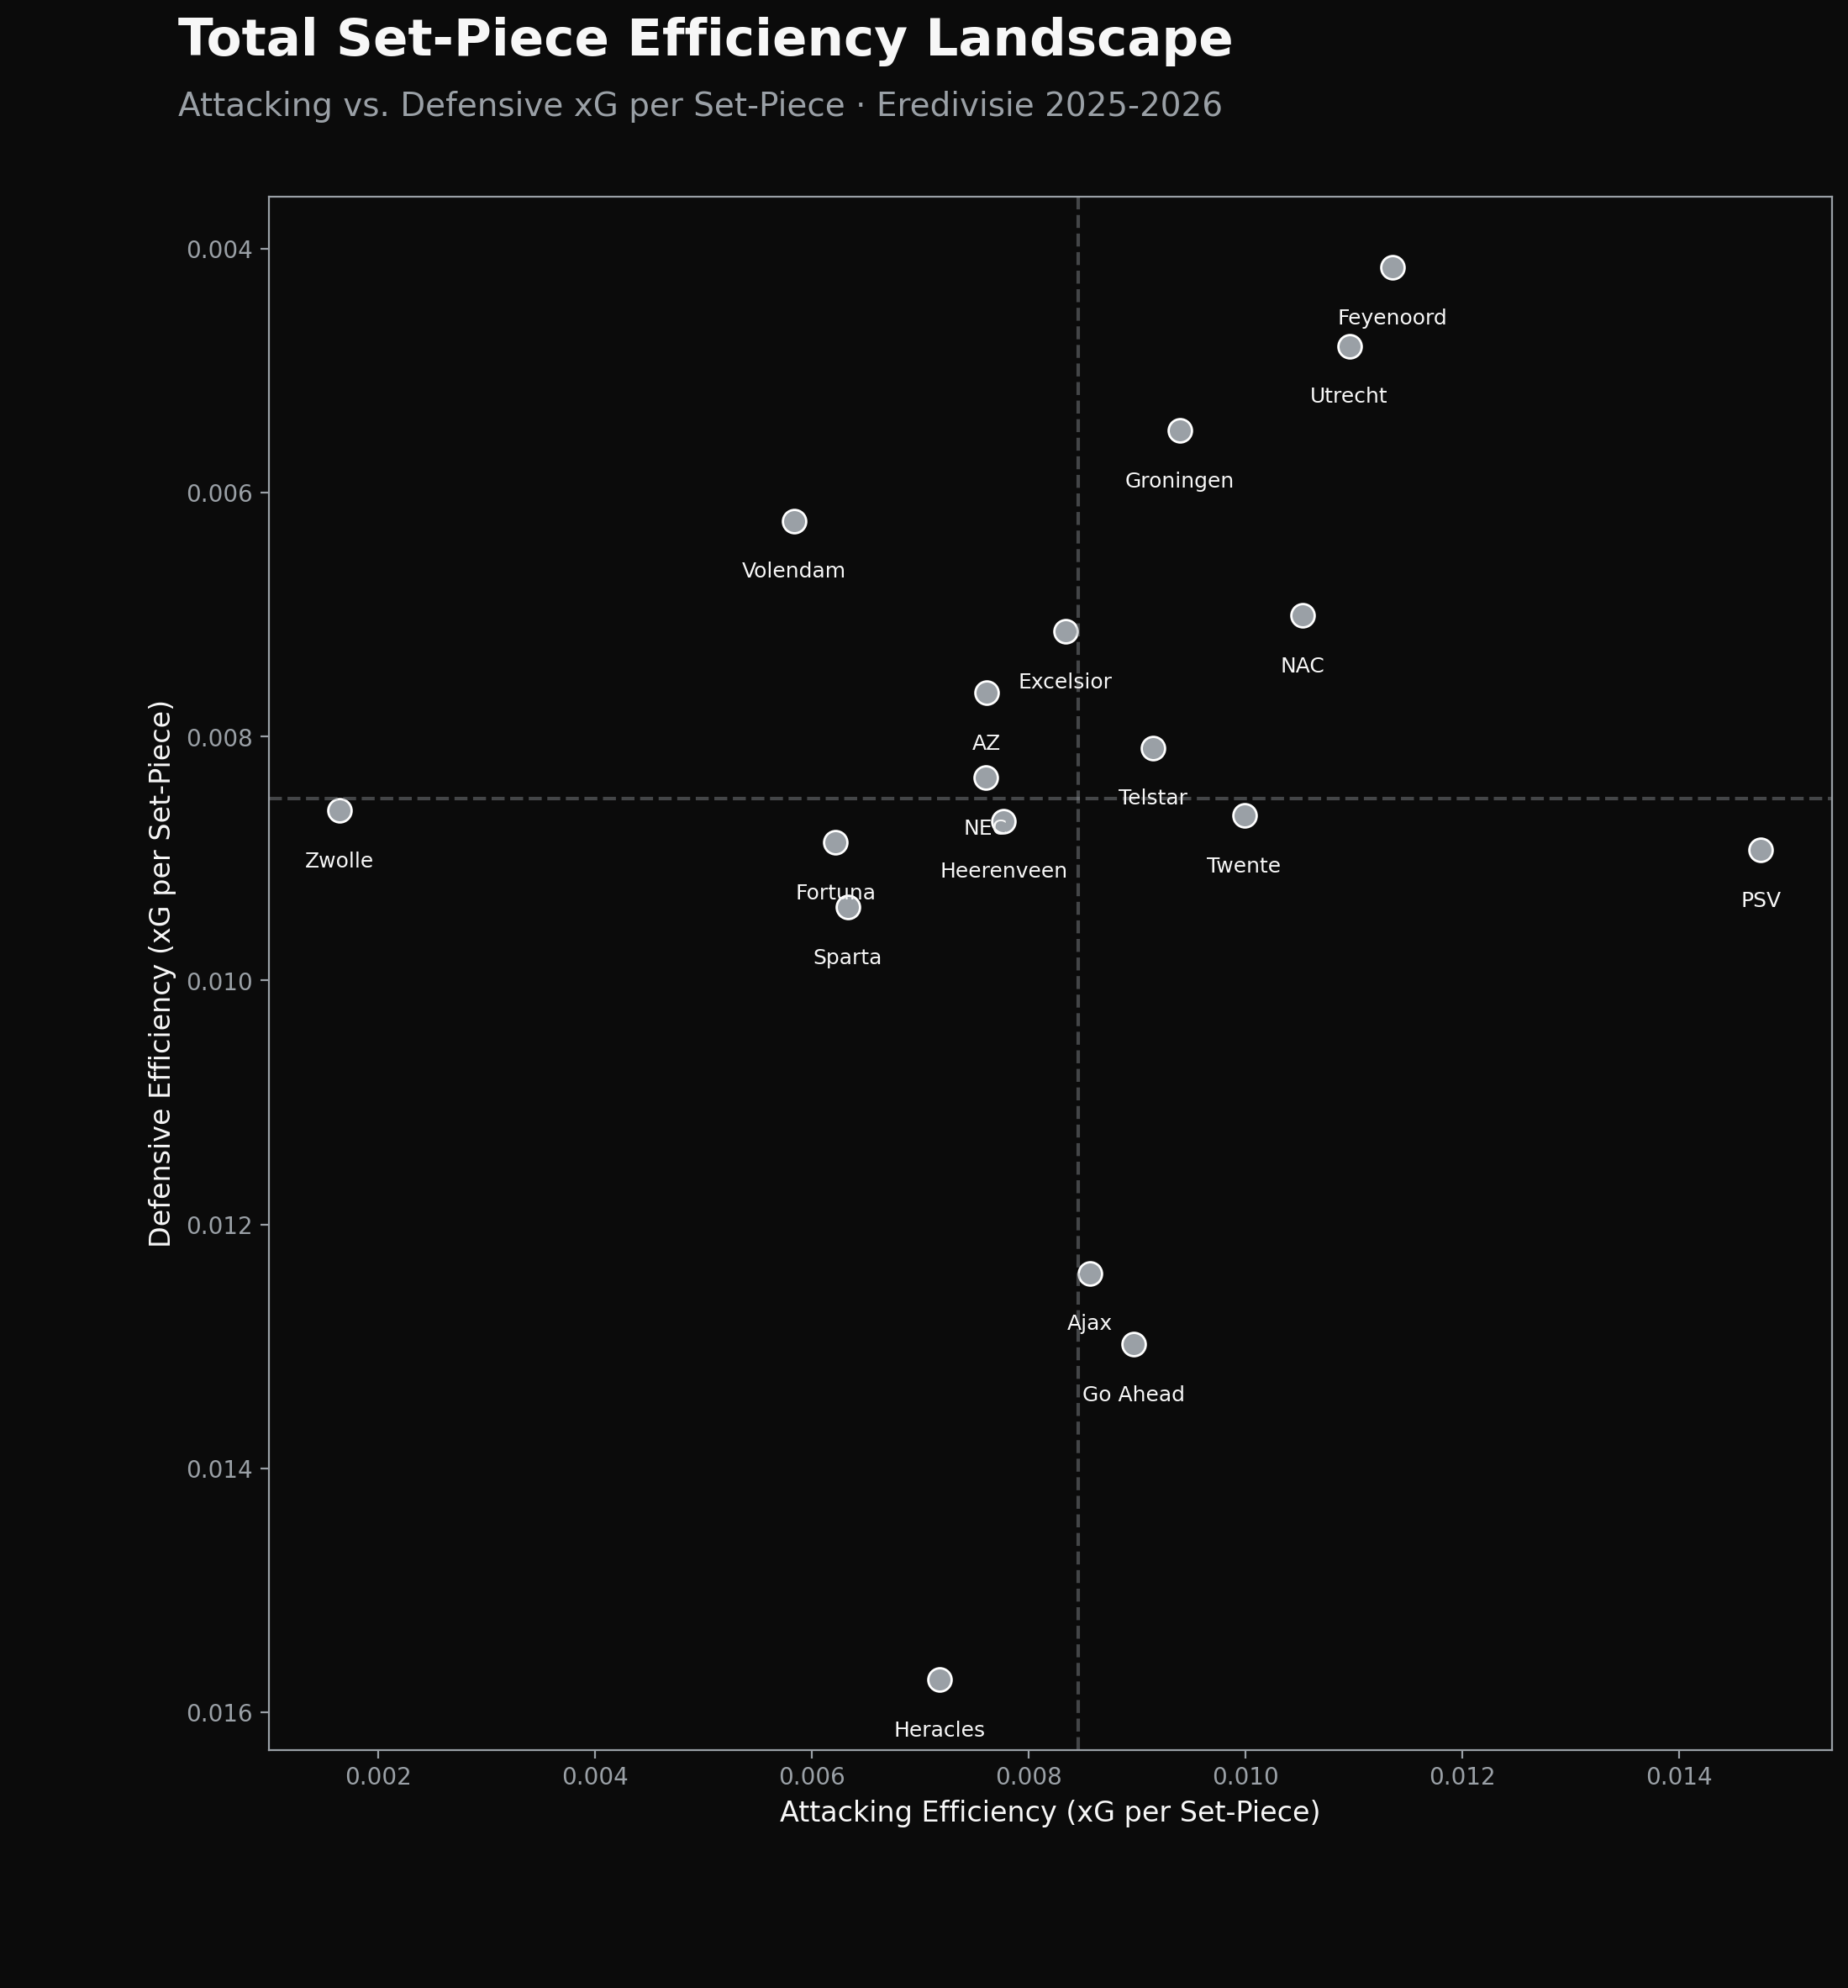

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
from pathlib import Path

# =========================================================================
# --- 1. CONFIGURATION & HOUSE STYLE ---
# =========================================================================

JSON_FOLDER = Path(r'/Users/user/XG/Eredivisie 2025-2026/DONE')
CSV_FOLDER = Path(r'/Users/user/XG/Eredivisie 2025-2026/xgCSV')
MAPPING_FILE = Path(r'/Users/user/XG/Eredivisie 2025-2026 Matches.csv')
TOTAL_FOLDER = Path(r'/Users/user/XG/Eredivisie 2025-2026/Total')

TOTAL_FOLDER.mkdir(parents=True, exist_ok=True)

OUTSWINGER = {
    "yellow":  "#F4C430",
    "black":   "#0B0B0B",
    "white":   "#F7F7F7",
    "grey":    "#9AA0A6",
    "emerald": "#2ECC71",
    "crimson": "#E63946",
    "blue":    "#4D96FF",
}

mpl.rcParams.update({
    "figure.facecolor": OUTSWINGER["black"],
    "axes.facecolor":   OUTSWINGER["black"],
    "savefig.facecolor":OUTSWINGER["black"],
    "text.color":       OUTSWINGER["white"],
    "axes.labelcolor":  OUTSWINGER["white"],
    "xtick.color":      OUTSWINGER["grey"],
    "ytick.color":      OUTSWINGER["grey"],
    "axes.edgecolor":   OUTSWINGER["grey"],
    "grid.color":       OUTSWINGER["grey"],
    "font.family":      "DejaVu Sans",
    "axes.titleweight": "bold",
})

# Opta Constants
SHOT_TYPES = [13, 14, 15, 16]
TYPE_PASS = 1

# Monitoring all set-piece types
SET_PIECES = {
    "Corner": {"pass": 6, "shots": [25, 96]}, # 96 is 2nd phase
    "Free Kick": {"pass": 5, "shots": [26]},
    "Throw-in": {"pass": 107, "shots": [160]}
}

# =========================================================================
# --- 2. DATA PROCESSING ---
# =========================================================================

def run_combined_analysis():
    # Load Mapping
    team_map = {}
    if MAPPING_FILE.exists():
        mapping_df = pd.read_csv(MAPPING_FILE)
        for i in range(2):
            id_col, name_col = f"matchInfo/contestant/{i}/id", f"matchInfo/contestant/{i}/shortName"
            if id_col in mapping_df.columns:
                team_map.update(dict(zip(mapping_df[id_col], mapping_df[name_col])))

    json_files = {f.stem: f for f in JSON_FOLDER.glob('*.json') if not f.name.endswith('_merged.json')}
    csv_files = {f.stem: f for f in CSV_FOLDER.glob('*.csv')}
    common = set(json_files.keys()).intersection(set(csv_files.keys()))

    total_stats = {}

    for title in common:
        df_csv = pd.read_csv(csv_files[title])
        shot_lookup = {
            (int(r['timeMin']), int(r['timeSec']), round(float(r['x']), 1), round(float(r['y']), 1)): r.to_dict() 
            for _, r in df_csv.iterrows()
        }

        with open(json_files[title], 'r', encoding='utf-8') as f:
            data = json.load(f)

        events = data.get('event', [])
        match_tids = list(set(e.get('contestantId') for e in events if e.get('contestantId')))
        if len(match_tids) != 2: continue
        
        ta, tb = match_tids
        for tid in match_tids:
            if tid not in total_stats:
                total_stats[tid] = {'count_for': 0, 'count_against': 0, 'xg_for': 0.0, 'xg_against': 0.0}

        for event in events:
            cid = event.get('contestantId')
            if not cid: continue
            oid = tb if cid == ta else ta
            
            quals = [q.get('qualifierId') for q in event.get('qualifier', [])]
            tid_type = event.get('typeId')

            # Aggregate Counts (Corners, FKs, Throw-ins)
            if tid_type == TYPE_PASS:
                if any(cfg['pass'] in quals for cfg in SET_PIECES.values()):
                    total_stats[cid]['count_for'] += 1
                    total_stats[oid]['count_against'] += 1

            # Aggregate xG (Shots from any set piece category)
            if tid_type in SHOT_TYPES:
                key = (int(event.get('timeMin', 0)), int(event.get('timeSec', 0)), round(float(event.get('x', 0)), 1), round(float(event.get('y', 0)), 1))
                if key in shot_lookup:
                    event.update(shot_lookup[key])
                    xg = float(event.get('xG', 0))
                    
                    if any(any(q in quals for q in cfg['shots']) for cfg in SET_PIECES.values()):
                        total_stats[cid]['xg_for'] += xg
                        total_stats[oid]['xg_against'] += xg

    # Create Efficiency Dataframe
    rows = []
    for tid, d in total_stats.items():
        name = team_map.get(tid, tid)
        eff_f = d['xg_for'] / d['count_for'] if d['count_for'] > 0 else 0
        eff_a = d['xg_against'] / d['count_against'] if d['count_against'] > 0 else 0
        rows.append({
            'Team': name,
            'EfficiencyFor': eff_f,
            'EfficiencyAgainst': eff_a,
            'Diff': eff_f - eff_a
        })
    
    return pd.DataFrame(rows)

# =========================================================================
# --- 3. PLOTTING COMBINED VISUALS ---
# =========================================================================

def create_plots(df):
    today = date.today().strftime("%d %B %Y")

    # Bar Charts for Total Efficiency
    metrics = [
        ("EfficiencyFor", "Total Set-Piece Attacking Efficiency", "xG created per set-piece (Corners, FKs, Throw-ins)", OUTSWINGER["emerald"]),
        ("EfficiencyAgainst", "Total Set-Piece Defensive Efficiency", "xG conceded per set-piece (Corners, FKs, Throw-ins)", OUTSWINGER["crimson"]),
        ("Diff", "Total Set-Piece Net Efficiency", "Efficiency For - Efficiency Against", OUTSWINGER["blue"])
    ]

    for col, title, sub, color in metrics:
        pdf = df.sort_values(col, ascending=True)
        fig, ax = plt.subplots(figsize=(11, 12), dpi=200)
        colors = [OUTSWINGER["yellow"] if team == "NEOM" else OUTSWINGER["grey"] for team in pdf["Team"]]
        bars = ax.barh(pdf["Team"], pdf[col], color=colors, height=0.6)
        
        for b in bars:
            w = b.get_width()
            ax.text(w + (0.0005 if w >= 0 else -0.0005), b.get_y() + b.get_height()/2, f"{w:.4f}", 
                    va="center", ha="left" if w >= 0 else "right", fontsize=10, fontweight="bold")
        
        fig.text(0.08, 0.95, title, fontsize=22, fontweight="bold")
        fig.text(0.08, 0.92, f"{sub} · Eredivisie 2025-2026", fontsize=14, color=OUTSWINGER["grey"])
        fig.lines.append(plt.Line2D([0.08, 0.18], [0.905, 0.905], lw=4, color=color))
        ax.xaxis.grid(True, linestyle="--", alpha=0.3)
        for s in ["top", "right"]: ax.spines[s].set_visible(False)
        fig.text(0.92, 0.04, f"Source: Opta | Updated {today}\nOutswinger FC · Marc Lamberts", fontsize=10, ha="right", color=OUTSWINGER["grey"])
        plt.savefig(TOTAL_FOLDER / f"total_set_piece_{col.lower()}.png", bbox_inches="tight")
        plt.close()

    # --- Combined Landscape Scatter Plot ---
    fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
    for i, row in df.iterrows():
        color = OUTSWINGER["yellow"] if row['Team'] == "NEOM" else OUTSWINGER["grey"]
        size = 200 if row['Team'] == "NEOM" else 100
        ax.scatter(row['EfficiencyFor'], row['EfficiencyAgainst'], color=color, s=size, edgecolors="white")
        ax.text(row['EfficiencyFor'], row['EfficiencyAgainst'] + 0.0005, row['Team'], ha="center", va="bottom", fontsize=9)

    ax.invert_yaxis() # Lower xG Against is better (Top of graph)
    ax.axvline(df['EfficiencyFor'].mean(), color=OUTSWINGER["grey"], linestyle="--", alpha=0.4)
    ax.axhline(df['EfficiencyAgainst'].mean(), color=OUTSWINGER["grey"], linestyle="--", alpha=0.4)
    ax.set_xlabel("Attacking Efficiency (xG per Set-Piece)", fontsize=12)
    ax.set_ylabel("Defensive Efficiency (xG per Set-Piece)", fontsize=12)

    fig.text(0.08, 0.95, "Total Set-Piece Efficiency Landscape", fontsize=22, fontweight="bold")
    fig.text(0.08, 0.92, "Attacking vs. Defensive xG per Set-Piece · Eredivisie 2025-2026", fontsize=14, color=OUTSWINGER["grey"])
    fig.lines.append(plt.Line2D([0.08, 0.18], [0.905, 0.905], lw=4, color=OUTSWINGER["yellow"]))
    plt.savefig(TOTAL_FOLDER / "total_set_piece_combined_landscape.png", bbox_inches="tight")

if __name__ == "__main__":
    df_results = run_combined_analysis()
    create_plots(df_results)